# Librairies

In [2]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import contextily as cx
import numpy as np

# Load data

In [3]:
gdf = gpd.read_file('raw/flux_routiers_2022_de_tours_et_de_son_aire_d_attraction.geojson')

In [5]:
gdf.nom.value_counts()

nom
Indre-et-Loire    1
Name: count, dtype: int64

In [6]:
gdf.dropna(subset = ['geometry', 'TMJO_2022'], inplace=True)

In [7]:
# We have Z coordinate: let's remove it:
from shapely.geometry import LineString

geometries = list()

for k in gdf.geometry :
    # List of coordinates of the first geometry
    l = list(k.geoms[0].coords)
    # We should remove the last coordinate of each point
    geometries.append(LineString([x[:-1] for x in l]))
    
gdf['geometry'] = geometries

In [9]:
gdf.geometry.unique().size

226

In [8]:
gdf

,id,ID_BDTOPO,NbS_TMJO22,TMJO_2022,code,_umap_options,nom,geometry
0,TRONROUT0000000031441348,TRONROUT0000000031441348,1.0,1041.0,5,None,None,"LINESTRING (0.68712 47.38782, 0.68752 47.38788)"
1,TRONROUT0000000031448822,TRONROUT0000000031448822,1.0,2579.0,5,None,None,"LINESTRING (0.66895 47.37962, 0.66811 47.37962..."
2,TRONROUT0000000031528552,TRONROUT0000000031528552,2.0,1119.0,5,None,None,"LINESTRING (1.04917 47.01972, 1.04922 47.0199,..."
3,TRONROUT0000000280776792,TRONROUT0000000280776792,1.0,4257.0,5,None,None,"LINESTRING (0.68213 47.40067, 0.68168 47.40057)"
4,TRONROUT0000002007160692,TRONROUT0000002007160692,1.0,1730.0,5,None,None,"LINESTRING (0.67272 47.42376, 0.67215 47.42372..."
...,...,...,...,...,...,...,...,...
221,TRONROUT0000000031450227,TRONROUT0000000031450227,2.0,62288.0,1,None,None,"LINESTRING (0.65186 47.36575, 0.65146 47.36549..."
222,TRONROUT0000000031449342,TRONROUT0000000031449342,2.0,59634.0,1,None,None,"LINESTRING (0.65192 47.3753, 0.65201 47.37512,..."
223,TRONROUT0000000031449011,TRONROUT0000000031449011,2.0,56876.0,1,None,None,"LINESTRING (0.65086 47.38384, 0.65085 47.38348..."
224,TRONROUT0000000220663847,TRONROUT0000000220663847,2.0,52408.0,1,None,None,"LINESTRING (0.64844 47.3897, 0.64848 47.38959,..."


(-0.0006866455078125, 1.4050981581755357, 46.8005503990642, 47.7545596189261)

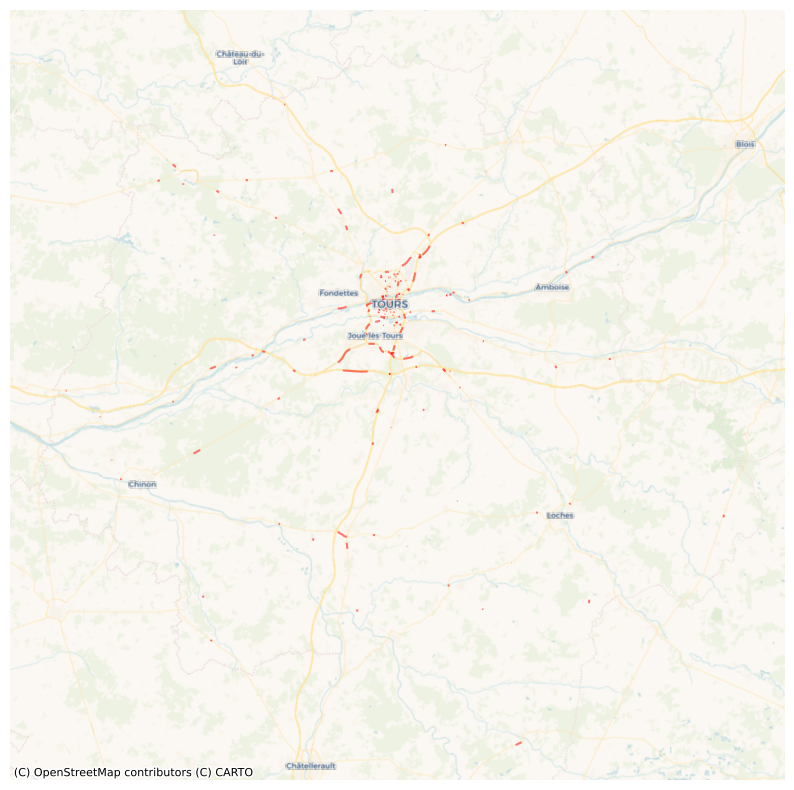

In [10]:
# Plot sensors
ax = gdf.plot(color = 'r', markersize = 20, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')
plt.axis('auto')

# Map Matching with OSM

In [11]:
import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import lines_matching

In [12]:
gdf = lines_matching(gdf)

Main graph loaded
Node 2003010178 not reachable from 2056796351
Node 381129949 not reachable from 2056796351
Node 2003010178 not reachable from 963656631
Node 381129949 not reachable from 963656631
Node 2003010178 not reachable from 2104788591
Node 2003010178 not reachable from 1666792448
Node 1272748876 not reachable from 381129949
Node 334462967 not reachable from 2058751768
Node 334462967 not reachable from 2050426710
Node 1962409168 not reachable from 2050426710
Node 1962409168 not reachable from 2036595850
Node 2050426710 not reachable from 2036595850
Node 1930615600 not reachable from 2050426710
Node 1930615600 not reachable from 2050426710
Node 1930615600 not reachable from 2036595850
Node 1930615600 not reachable from 2036595850
Node 1955736009 not reachable from 1896923518
Node 1921831107 not reachable from 201341726
Node 1930615600 not reachable from 201341726
Node 1955736009 not reachable from 201341726
Node 2050426710 not reachable from 1921831107
Node 2040069948 not reacha

In [13]:
gdf.rename(columns = {'TMJO_2022':'AAWT'}, inplace=True)

# Final saving

In [15]:
gdf[[
    'AAWT',
    'osm_name',
    'osm_type',
    'osm_lanes',
    'osm_oneway',
    'osmid',
    'geometry'
]].to_file('treated/Tours_AAWT_2022.geojson', index = False)